In [1]:
import  pandas as pd 
import matplotlib.pyplot as plt 
from datetime import datetime
import numpy as np
import datetime
import calendar
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题
%matplotlib inline 

In [2]:
data = pd.read_csv("prices.csv")
data.columns =["city",'area' ,"year"] + [ 'm'+str(i) for i in range(1,13)]
data.head()

,city,area,year,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,beijing,朝阳,2010,27206.0,26827.0,26662.0,26153.0,25655.0,25893.0,26619.0,27291.0,26421.0,22894.0,21907.0,21231.0
1,shenzhen,龙岗,2010,10462.0,10326.0,10077.0,9808.0,9474.0,9501.0,9312.0,9295.0,9359.0,9187.0,9073.0,8994.0
2,shanghai,闵行,2010,19548.0,19395.0,19372.0,19089.0,18962.0,18942.0,19307.0,19426.0,19004.0,17950.0,17636.0,17205.0
3,beijing,海淀,2010,30536.0,30169.0,29805.0,29226.0,28667.0,28763.0,29557.0,30080.0,29331.0,25662.0,24518.0,23927.0
4,beijing,东城,2010,33868.0,33538.0,33541.0,33075.0,32172.0,31896.0,32634.0,33242.0,31966.0,28692.0,27445.0,26277.0


In [3]:
df = data.loc[(data['city']=="beijing")  & (data['area']=="朝阳" ),:]

In [4]:
df

,city,area,year,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,beijing,朝阳,2010,27206.0,26827.0,26662.0,26153.0,25655.0,25893.0,26619.0,27291.0,26421.0,22894.0,21907.0,21231.0
78,beijing,朝阳,2012,33329.0,32608.0,32020.0,31466.0,30692.0,29868.0,29103.0,28646.0,28394.0,27835.0,27067.0,27273.0
127,beijing,朝阳,2013,44662.0,44442.0,44090.0,43221.0,42672.0,42030.0,41528.0,40922.0,40304.0,38350.0,36017.0,34858.0
165,beijing,朝阳,2014,44090.0,44096.0,43938.0,43924.0,44177.0,43444.0,44553.0,45007.0,45002.0,45161.0,44964.0,44836.0
188,beijing,朝阳,2015,44308.0,43887.0,43654.0,43504.0,43202.0,43071.0,42994.0,42837.0,42690.0,43033.0,44021.0,43855.0
235,beijing,朝阳,2016,70278.0,69027.0,64868.0,59485.0,56975.0,55645.0,54906.0,54324.0,53363.0,50231.0,47062.0,46153.0
279,beijing,朝阳,2017,74639.0,75142.0,76145.0,77188.0,77766.0,79853.0,82057.0,82910.0,83190.0,78387.0,73278.0,72018.0
320,beijing,朝阳,2018,74312.0,74399.0,76059.0,76208.0,74733.0,74688.0,74169.0,73377.0,72735.0,72500.0,74920.0,73412.0
354,beijing,朝阳,2019,72218.0,72639.0,72821.0,73066.0,73457.0,73972.0,74253.0,74155.0,74456.0,74705.0,75091.0,74379.0
378,beijing,朝阳,2020,71717.0,71693.0,71688.0,71932.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
date_list = [] 
for idx , row in df.iterrows():
    for i in range(1, 13) :
        date_str = str(row.year)+'/'+ str(i)
        date_list.append( (date_str  , row[ "m"+str(i)] ) )

In [6]:
df = pd.DataFrame(date_list , columns =['date' ,'price'])

In [7]:
df.date = pd.to_datetime( df.date ,  format="%Y/%m")

In [8]:
df.set_index(df.date ,inplace= True)

In [9]:
df_month = df['2012-01':'2020-04']

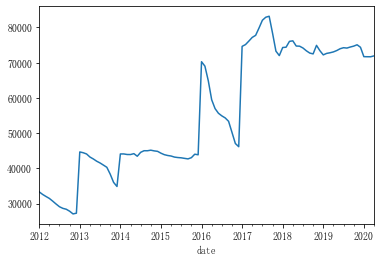

In [10]:
df_month.price.plot()

In [32]:
import statsmodels.api  as sm
from itertools import product
import  warnings 
warnings.filterwarnings('ignore')

ps = range(0, 3)
qs = range(0, 3)
ds = range(1, 2)
parameters = product(ps, qs,ds)
parameters_list = list(parameters)
# 寻找最优ARMA模型参数，即best_aic最小
results = []
best_aic = float("inf") # 正无穷
for param in parameters_list:
    try:
        model = sm.tsa.statespace.SARIMAX(df_month.price,
                                order=(param[0], param[1], param[2]),
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()

    except ValueError:
        print('参数错误:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
print('最优模型: ', best_model.summary())

最优模型:                                 SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                  106
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -956.557
Date:                Sun, 12 Apr 2020   AIC                           1917.114
Time:                        21:29:26   BIC                           1922.384
Sample:                    01-01-2012   HQIC                          1919.249
                         - 10-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0298      0.312      0.096      0.924      -0.581       0.641
sigma2      2.198e+07   9.07e+05     24.241      0.000    2.02e+07    2.38e+07
Ljung-Box (Q):                       59.75   

In [21]:
results

[[(0, 0, 1), 2140.445336619022],
 [(0, 1, 1), 1955.8793123650453],
 [(0, 2, 1), 1941.7536636817156],
 [(1, 0, 1), 1979.2712564623712],
 [(1, 1, 1), 1957.8162376859857],
 [(1, 2, 1), 1943.676016260387],
 [(2, 0, 1), 1981.2254802677203],
 [(2, 1, 1), 1952.2872040012446],
 [(2, 2, 1), 1945.1828997778614]]

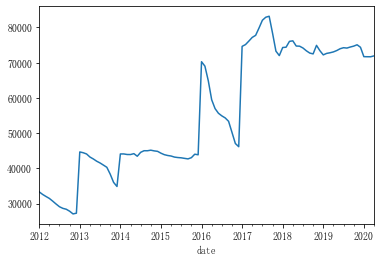

In [22]:
df_month.price.plot()

In [23]:
df_month

,date,price
date,,
2012-01-01,2012-01-01,33329.0
2012-02-01,2012-02-01,32608.0
2012-03-01,2012-03-01,32020.0
2012-04-01,2012-04-01,31466.0
2012-05-01,2012-05-01,30692.0
...,...,...
2019-12-01,2019-12-01,74379.0
2020-01-01,2020-01-01,71717.0
2020-02-01,2020-02-01,71693.0


In [24]:
future_month = 6
last_time = df_month.index[len(df_month) -1 ]
furture_time_list = [] 
for  i in range( future_month) :
    month = last_time.month 
    year = last_time.year
    days = calendar.monthrange(  year  ,  month )[1]
    if month == 12 :
        month =1 
        year+=1 
    last_time =   last_time + datetime.timedelta( days = days )
    furture_time_list.append( last_time) 
        
furture_time_list

[Timestamp('2020-05-01 00:00:00'),
 Timestamp('2020-06-01 00:00:00'),
 Timestamp('2020-07-01 00:00:00'),
 Timestamp('2020-08-01 00:00:00'),
 Timestamp('2020-09-01 00:00:00'),
 Timestamp('2020-10-01 00:00:00')]

In [25]:
future = pd.DataFrame( index= furture_time_list , columns= df_month.columns)

In [26]:
df_month =pd.concat( [df_month  , future ])

In [27]:
df_month 

,date,price
2012-01-01,2012-01-01,33329.0
2012-02-01,2012-02-01,32608.0
2012-03-01,2012-03-01,32020.0
2012-04-01,2012-04-01,31466.0
2012-05-01,2012-05-01,30692.0
...,...,...
2020-06-01,NaT,NaN
2020-07-01,NaT,NaN
2020-08-01,NaT,NaN
2020-09-01,NaT,NaN


In [33]:
df_month['forecast'] = best_model.get_prediction(start=0,end=len(df_month)).predicted_mean

In [34]:
import numpy as np
df_month['forecast'][0] = np.nan

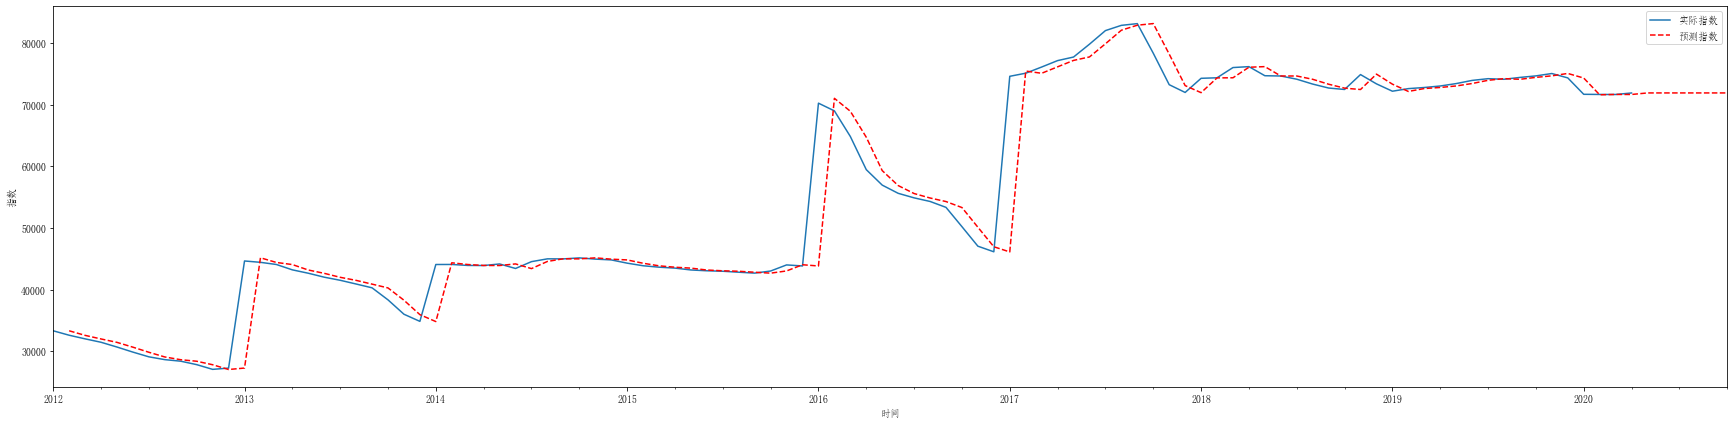

In [35]:
plt.figure(figsize=(30,7))
df_month.price.plot(label='实际指数')
df_month.forecast.plot(color='r', ls='--', label='预测指数')
plt.legend()
plt.xlabel('时间')
plt.ylabel('指数')
plt.show()